# <h1> Introduction<br>
Data  = Cars_price.csv<br>
Columns :<br>
       

1.   make = Manufacture of Cars<br>
2.   model  =  Model name of cars<br>
3.   priceUSD = Price of cars<br>
4.   condition = Condition of car
5.   Mileage(kilometers) = Mileage of car
6.   Fuel_type = Fuel type of car Petrol or diesel or electric car
7.  Volume(cm3) = Volume of car
8. color = Color of car
9. Transmission = Transimission of Car
10. Segment = Segment in which the car belong to .
11. drive_unit = Drive will front wheel or rear wheel 

<h2>Task</h2><h2> Predict the price of car<br>


<H2> STEPS THAT FOLLOW </H2>


*   Reading the Data
*   Checking Missing Value
*   Explorartary Data Analysis
*   Hypothesis Testing 
*   Cleaning Data
* Encoding the categorical Data
* Normalizing the numerical data
* Train ML model on data
* Summary



        


# Metric 

1.  Root mean Squared Error
2.  Mean Absolute Percentage Error


# Import Library

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
#style.use('fivethirtyeight')
plt.style.use('ggplot')

# Reading Data

In [5]:
## Reading dataset
df = pd.read_csv("/content/drive/My Drive/cars_price.csv")
df = df.drop([df.columns[0]],axis = 1)
print(df.shape)
df.head()

(40000, 12)


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


# Checking Missing Value 


In [ ]:
#FINDING MISSING VALUE COLUMNS
df.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

Volumns(cm3),drive_unit,segment containing missing values

In [ ]:
# Getting percentage of missing values in the  columns
print("PERCENTAGE OF MISSING VALUE IN volume(cm3) = ",(df['volume(cm3)'].isnull().sum()/df.shape[0])*100)
print("PERCENTAGE OF MISSING VALUE IN drive_unit = ",(df['drive_unit'].isnull().sum()/df.shape[0])*100)
print("PERCENTAGE OF MISSING VALUE IN segment = ",(df['segment'].isnull().sum()/df.shape[0])*100)

PERCENTAGE OF MISSING VALUE IN volume(cm3) =  0.075
PERCENTAGE OF MISSING VALUE IN drive_unit =  3.3625000000000003
PERCENTAGE OF MISSING VALUE IN segment =  9.3875


Missing value in volume(cm3) containing lesser percentage of whole data.It can be removable from the data


In [ ]:
#Getting percentage of data left after removing missing value
print("Percentage of Data left after removing the missing values = ",(df.dropna().shape[0]/df.shape[0])*100)

Percentage of Data left after removing the missing values =  87.53999999999999


87% of data is left from the whole dataset after removing the missing value.

# EXPLORARTARY DATA ANALYSIS

## Total Company 

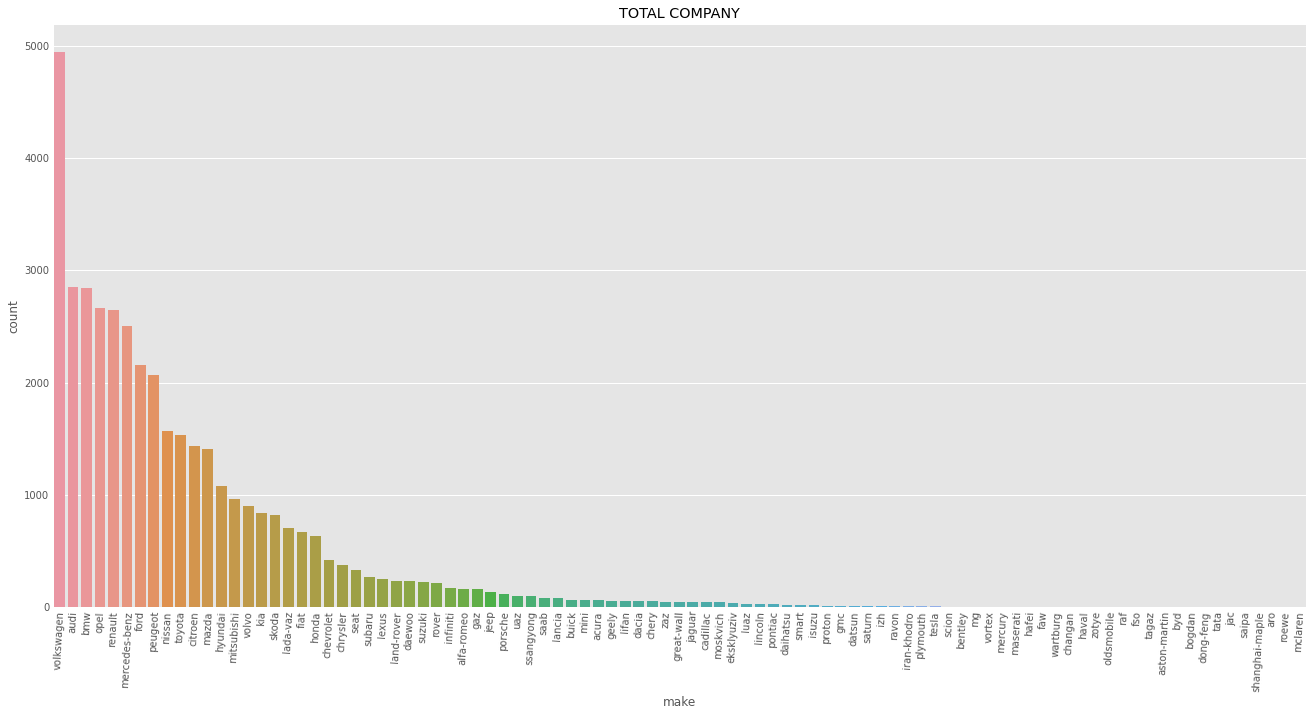

In [ ]:
# Plot the Manufacture of cars 
make_count = []
for val in df['make'].unique():
  make_count.append(df[df['make']==val]['make'].count())
make_df = pd.DataFrame(df['make'].unique(),columns=['make'])
make_df['count'] = make_count
make_df = make_df.sort_values(by = ['count'],ascending=False)
fig, ax = plt.subplots(figsize=(20,10))
mask_plt= sns.barplot(x = 'make',y = 'count',data = make_df)
plt.title("TOTAL COMPANY")
for item in mask_plt.get_xticklabels():
    item.set_rotation(87)

Cars company volkswagen has maximum number of car

## Plot the Number of Model that every Manufacturer has:-

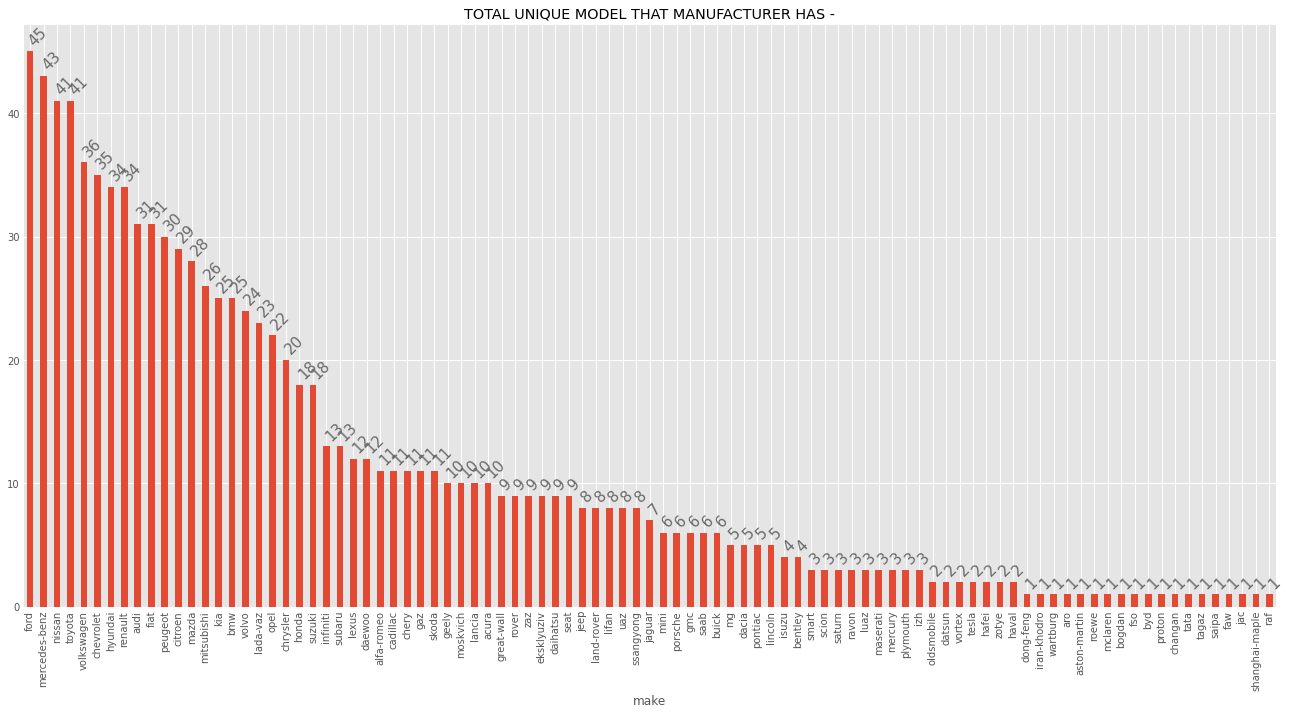

In [ ]:
### Plot the Number of Model that every manufacturer has:-
ax = df.groupby('make')['model'].nunique().sort_values(ascending = False).plot.bar(title = "TOTAL UNIQUE MODEL THAT MANUFACTURER HAS -",figsize = (20,10))
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(i.get_height()), fontsize=15,
                color='dimgrey',rotation = 45)

FORD has maximum number of models.

## Total car in any particular Year

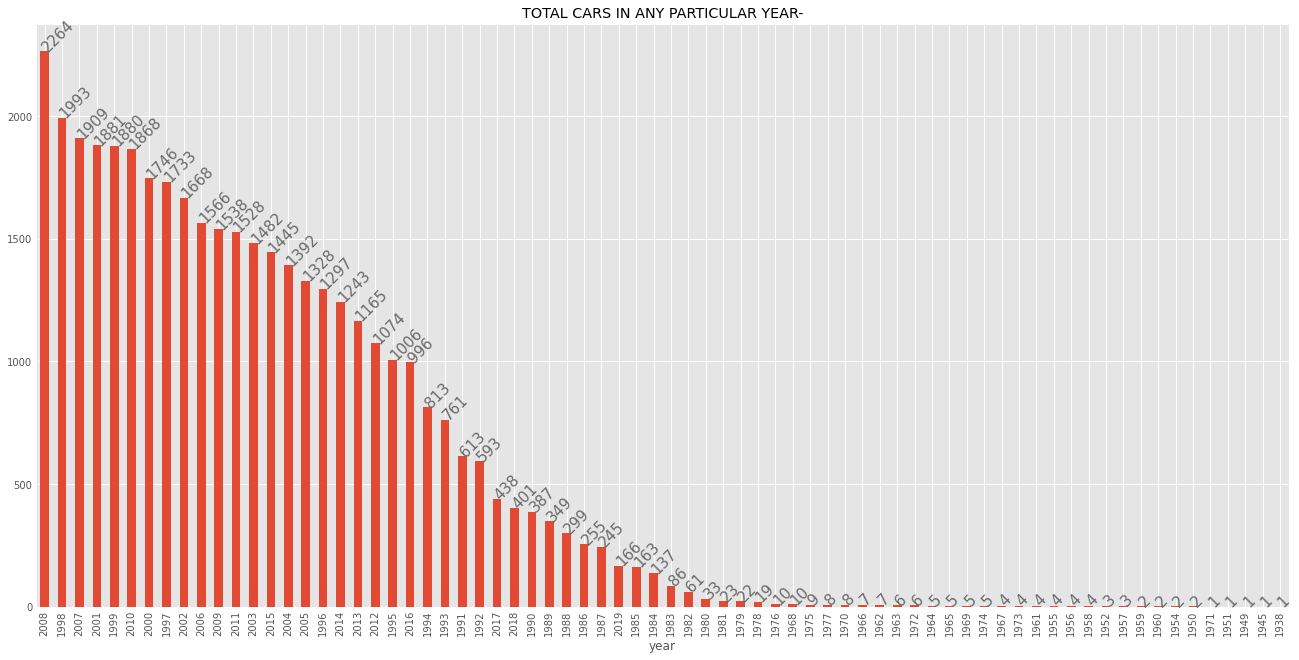

In [ ]:
## Total Cars that are present in any Particular Year
ax = df.groupby('year')['make'].count().sort_values(ascending = False).plot.bar(title = "TOTAL CARS IN ANY PARTICULAR YEAR-",figsize = (20,10))
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(i.get_height()), fontsize=15,
                color='dimgrey',rotation = 45)

2008 has maximum number of cars are there.

## Different condition of cars:-

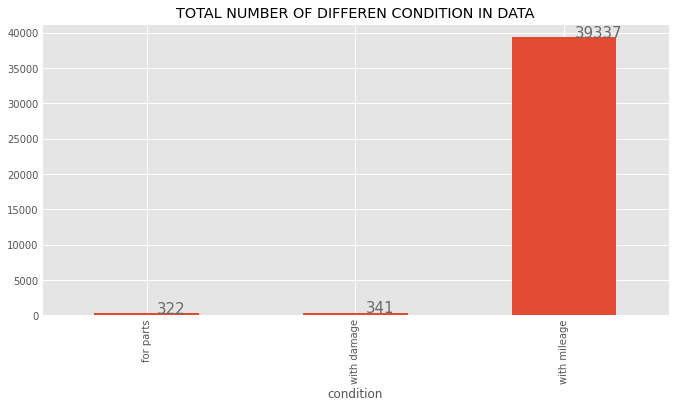

In [ ]:
ax = df.groupby('condition')['make'].count().plot.bar(figsize = (10,5),title = 'TOTAL NUMBER OF DIFFEREN CONDITION IN DATA')
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.3, i.get_height()+2, \
            str(i.get_height()), fontsize=15,
                color='dimgrey',rotation = 0)

condition with mileage has maximum in our data

##  Plot the mileage,price and year with each other:-

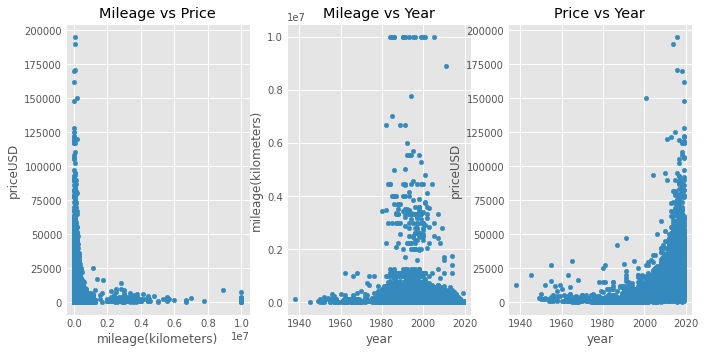

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1,ncols =3,figsize = (10,5))
df.sort_values('mileage(kilometers)')[['priceUSD','mileage(kilometers)']].plot.scatter(y= 'priceUSD',x = 'mileage(kilometers)',title = 'Mileage vs Price',ax = ax1)
#Plot Mileage vs Year 
df.sort_values('year')[['year','mileage(kilometers)']].plot.scatter(x = 'year',y = 'mileage(kilometers)',title = 'Mileage vs Year',ax=ax2)
#Plot Price vs Year 
df.sort_values('year')[['year','priceUSD']].plot.scatter(x = 'year',y = 'priceUSD',title = 'Price vs Year',ax=ax3)


Conclusion : - 


1.  Max Price of car has less mileage.
2.  After 1980 we can see a higher trend of mileage.
3. As the year going the price of cars is also increasing.




## Plot the Average mileage with different condition and price :-

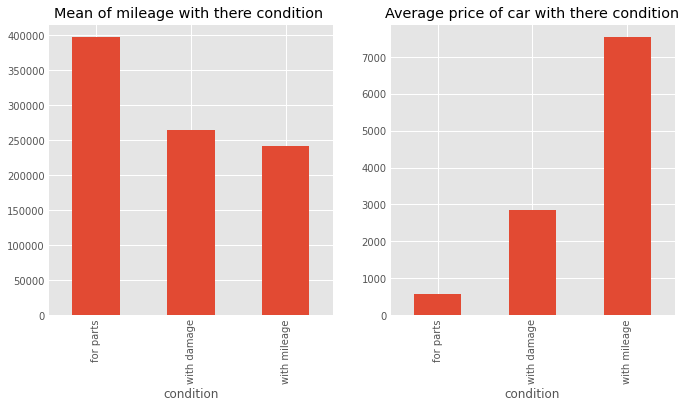

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols =2,figsize = (10,5))
# Mean of mileage with condition 
df.groupby(['condition'])['mileage(kilometers)'].mean().plot.bar(title = 'Mean of mileage with there condition ',ax = ax1)
# Mean of price with condition 
df.groupby(['condition'])['priceUSD'].mean().plot.bar(title = 'Average price of car with there condition',ax = ax2)

We can see that, condition 'with mileage' has lesser mileage and from above analysis lesser mileage has maximum cost.So we can say that with mileage condition most cars has maximum price. With mileage condition has maximum price of cars.This prove that our analysis is correct.

## Plot Fuel_type with Mileage and price 

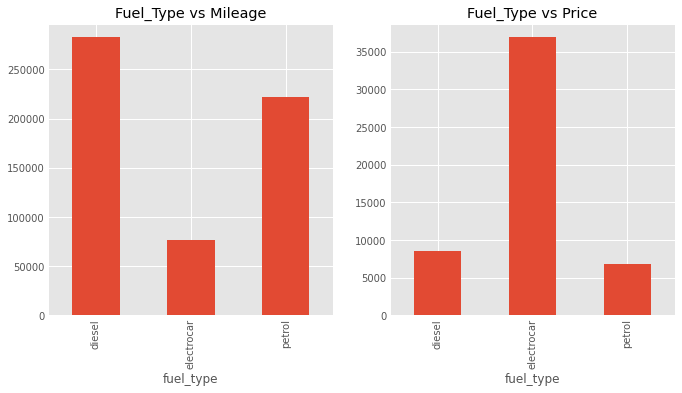

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols =2,figsize = (10,5))
# analyse the fuel type with mileage
df.groupby('fuel_type')['mileage(kilometers)'].mean().plot.bar(title = 'Fuel_Type vs Mileage',ax = ax1)
df.groupby('fuel_type')['priceUSD'].mean().plot.bar(title = 'Fuel_Type vs Price',ax = ax2)


Diesel has maximum mileage and electrocar has minimum mileage.From our previous analysis that less mileage has higher price of car. Hence, we can see that 
<h5>Electrocar has maximum price.

## Plot Volume with Mileage and Price

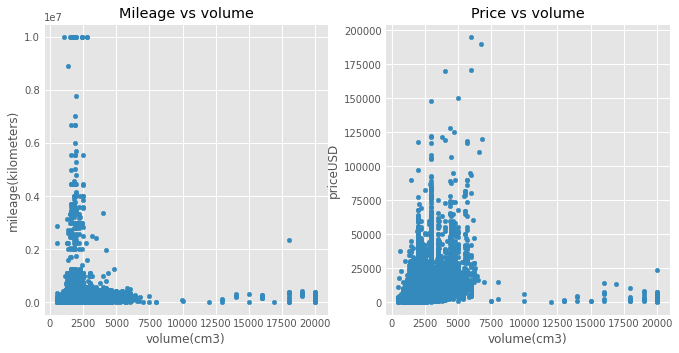

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols =2,figsize = (10,5))
df.sort_values('volume(cm3)').plot.scatter(x = 'volume(cm3)',y = 'mileage(kilometers)',title = 'Mileage vs volume',ax = ax1)
df.sort_values('volume(cm3)').plot.scatter(x = 'volume(cm3)',y = 'priceUSD',title = 'Price vs volume',ax = ax2)

Less volume has higher mileage than larger volume car.UPTO 7500 volume(cm3) mileage is high and in price graph we can also see this trend.

## Plot Transmission with respective to mileage and price respectively

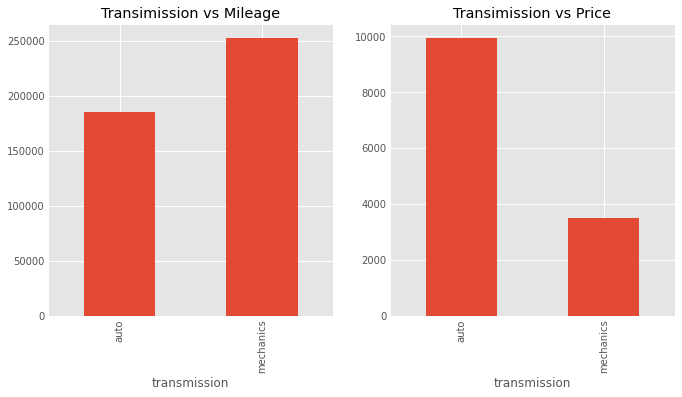

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols =2,figsize = (10,5))
## Transmission vs Mileage plot
df.groupby('transmission')['mileage(kilometers)'].median().plot.bar(title = "Transimission vs Mileage",ax  =ax1)
## Transmission vs Price plot
df.groupby('transmission')['priceUSD'].median().plot.bar(title = "Transimission vs Price",ax  =ax2)

Auto has Lesser mileage than Mechanics and from our previous analysis auto must have higher price and we can see this in graph also



## Plot DriveUnit with respective mileagea nd price

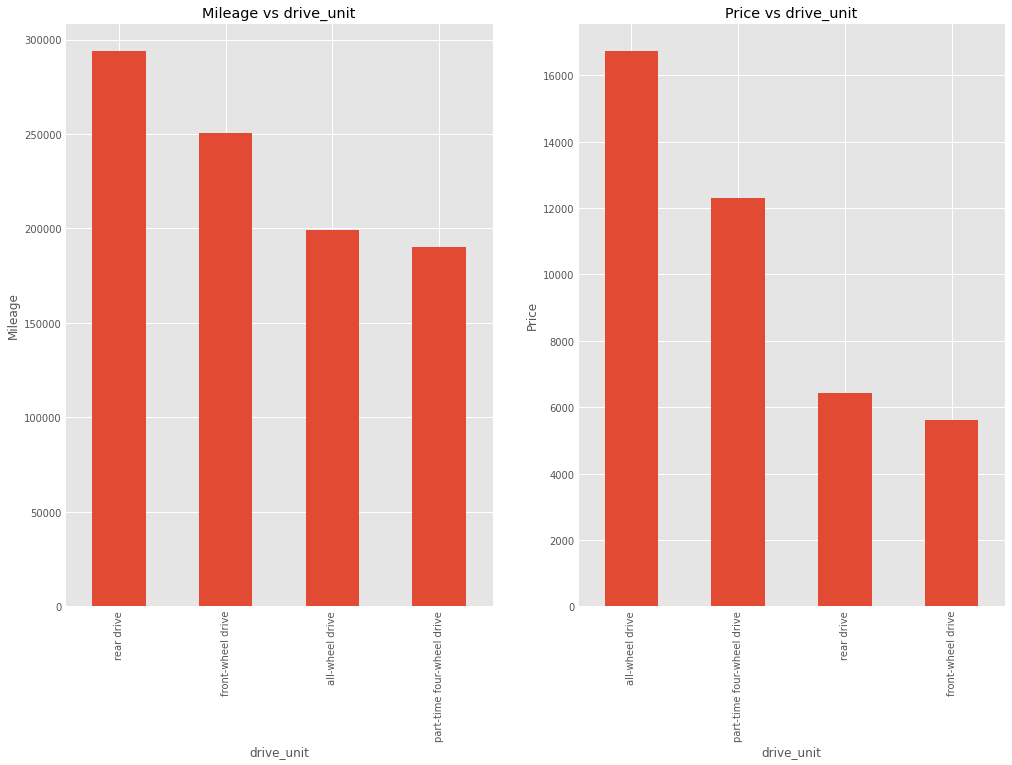

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols =2,figsize = (15,10))
df.dropna().groupby('drive_unit')['mileage(kilometers)'].mean().sort_values(ascending = False).plot.bar(ax = ax1,ylabel = 'Mileage',title = 'Mileage vs drive_unit')
df.dropna().groupby('drive_unit')['priceUSD'].mean().sort_values(ascending = False).plot.bar(ax= ax2,ylabel = 'Price',title = 'Price vs drive_unit')

Part-time wheel drive car has lesser mileage.All- wheel drive has maximum price and front-wheel drive has lesser price.From above analysis higher mileage cars is cheaper. And the rear drive car has large mileage and there prices is low.
From our conclusion : Low price car has high mileage or vice-versa


## Plot segment with respective to Mileage and Price

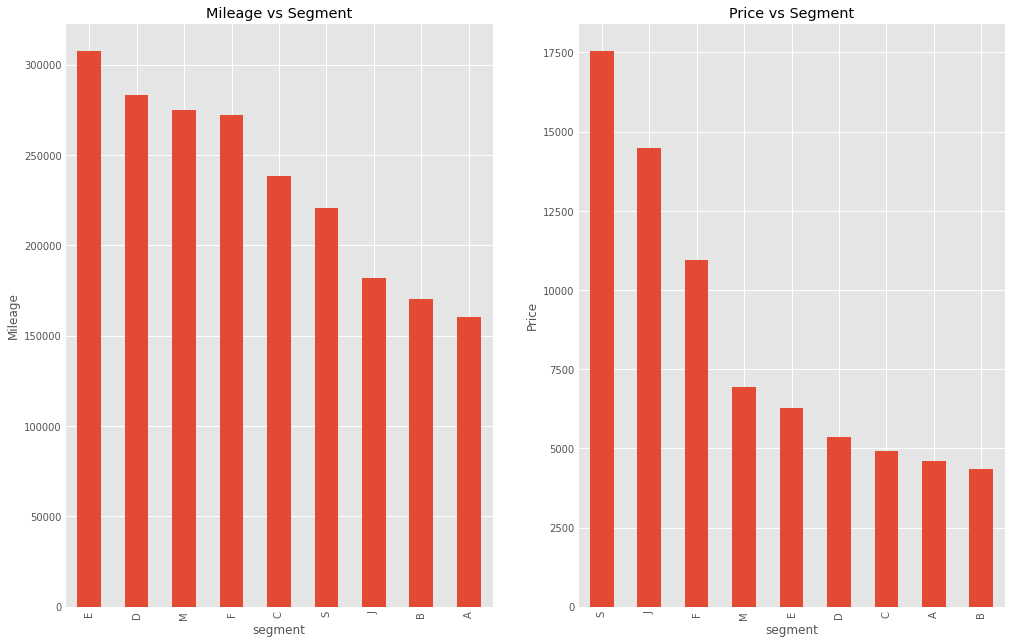

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols =2,figsize = (15,10))
df.dropna().groupby('segment')['mileage(kilometers)'].mean().sort_values(ascending = False).plot.bar(ax = ax1,ylabel = 'Mileage',title = 'Mileage vs Segment')
df.dropna().groupby('segment')['priceUSD'].mean().sort_values(ascending = False).plot.bar(ax= ax2,ylabel = 'Price',title = 'Price vs Segment')

SEGMENT S HAS MAXIMUM PRICE IN ALL WHILE THE S SEGMENT MILEAGE IS ALSO LOW.OUR CONCLUSION OF LESSER MILEAGE HAS HIGHER PRICE CAR IS NOT SEEN HERE BECAUSE A AND B SEGMENT HAS LESS MILEAGE BUT STILL THERE PRICE IS LOW.THAT MEAN OUR ANALYSIS HAS ALSO HAS SOME EXCEPTION THAT ARE IN SEGMENT OF CAR BUT STILL WE CAN SEE HERE THAT S SEGMENT IS NOT AS HIGH AS OTHER HIGHER MILEAGE SEGMENT CAR.

## Plot Box plot and Distribution of mileage

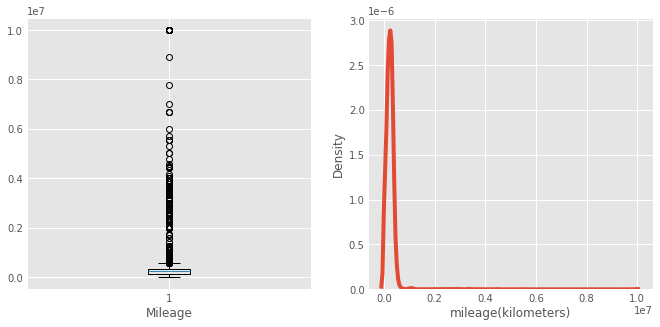

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.set_xlabel('Mileage')
ax1.boxplot(df['mileage(kilometers)'],vert=True)
sns.kdeplot(df['mileage(kilometers)'],ax = ax2)

This show that less mileage car is more in our data than higher mileage.Mileage distribution constite of much more wider range.

#Hypothesis Testing

## IS MILEAGE OF CAR INCREASE BY THE YEAR?

Hypothesis TEST: <br>
Q) IS MILEAGE OF CAR INCREASE BY THE YEAR?<br>
For that we divide into two subset of equal length  and check that both have same mean.If the mean of both the subset is same then mileage is not increasing by the year.<br>

Null Hypothesis (H0) = Both does not have same mean.<br>
Alternate Hypothesis (h1) =  Both have same mean.<br>
Critical_Value = 0.05 

In [ ]:
from scipy.stats import ttest_1samp,ttest_ind,ttest_rel
# getting two subset with equal length
subset_1 = df.sort_values('year')['mileage(kilometers)'][:20000]
subset_2 = df.sort_values('year')['mileage(kilometers)'][20000:]
tset, pval = ttest_rel(subset_1,subset_2)
pval <0.05
print("p-values",pval)
if pval < 0.05:  
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 0.0
 we are rejecting null hypothesis


This shows that as increase in the mileage doesnot depend on the year increases

## BOTH THE MILEAGE AND VOLUME FOLLOW THE SAME DISTRIBUTION

HYPOTHESIS = BOTH THE MILEAGE AND VOLUME FOLLOW THE SAME DISTRIBUTION <BR>
NULL HYPOTHESIS = BOTH FOLLOW SAME DISTRIBUTION<BR>
ALTERNATE HYPOTHESIS =  BOTH FOLLOW DIFFERENT DISTRIBUTION<BR>
CRITICAL VALUE = 0.05<BR>

In [ ]:
from scipy.stats import ks_2samp
from sklearn.preprocessing import Normalizer
mileage = df['mileage(kilometers)']/max(df['mileage(kilometers)'])
volume  = (df['volume(cm3)']-min(df['volume(cm3)']))/(max(df['volume(cm3)'])-min(df['volume(cm3)']))
thred,pval = stats.ks_2samp(mileage,volume)
pval <0.05
print("p-values",pval)
if pval < 0.05:  
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 0.0
 we are rejecting null hypothesis



---
THIS SHOW THAT BOTH MILEAGE AND VOLUME IS TAKEN FROM DIFFERENT DISTRIBUTION



## Categorical Hypothesis Testing 

In [ ]:
# condition and fuel_tyep is independent
# segment and transmiss
import scipy.stats
def Check_hypothesis(categorical_1,categorical_2):
  """ Chi - square test perform on categorical variable to categorical data is independent or not 
      Alpha(critical value) is fixed to 0.05
      Return :None
      Print :
        chi-square statistic :
        citical_value: 
        p-value:
        Print is related or not  
  """
  
  cross_tab  = pd.crosstab(df['condition'],df['fuel_type'])
  b=scipy.stats.chi2_contingency(cross_tab)
  Expected_val = b[3]
  no_of_rows=cross_tab.shape[0]
  no_of_columns=cross_tab.shape[1]
  dof=(no_of_rows-1)*(no_of_columns-1)
  alpha = 0.05
  Observed_Values = cross_tab.values
  chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_val)])
  chi_square_statistic=chi_square[0]+chi_square[1]
  print("chi-square statistic:-",chi_square_statistic)
  critical_value=chi2.ppf(q=1-alpha,df=dof)
  print('critical_value:',critical_value)
  p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
  print('p-value:',p_value)
  if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
  else:
    print("Retain H0,There is no relationship between 2 categorical variables")
      
  if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
  else:
    print("Retain H0,There is no relationship between 2 categorical variables")


Hypothesis testing:<br>
Categorical variable in data is related to each other or not<br>
H0 : There is no relatioship between them<br>
H1 : There is relationship between them<br>

## Condition of Cars is related with Fuel Type

In [ ]:
#Hypothesis testing on condition and fuel_type of car
print("Hypothesis Testing of Condition of cars and fuel_type of cars is Dependent or Independent to each other:-")
Check_hypothesis(df['condition'],df['fuel_type'])

Hypothesis Testing of Condition of cars and fuel_type of cars is Dependent or Independent to each other:-
chi-square statistic:- 28.213210490998044
critical_value: 9.487729036781154
p-value: 1.129135506139356e-05
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


## Condition of Fuel_type is related to segment

In [ ]:
print("Hypothesis Testing   fuel_type of cars and segment of  cars is Dependent or Independent to each other:-")
Check_hypothesis(df['fuel_type'],df['segment'])

Hypothesis Testing   fuel_type of cars and segment of  cars is Dependent or Independent to each other:-
chi-square statistic:- 28.213210490998044
critical_value: 9.487729036781154
p-value: 1.129135506139356e-05
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# TRAINING MODEL

## Cleaning Data

In [6]:
## REMOVE NULL VALUES FROM THE DATA
df = df.dropna()
print(df.shape)
df.head()

(35016, 12)


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,honda,accord,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,ford,fusion,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,nissan,teana,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,volkswagen,fox,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,nissan,primera,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D


## Split into Training and Test Data

In [7]:
from  sklearn.model_selection import train_test_split
y = df['priceUSD']
x  = df.drop(['priceUSD'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=44)
print("X_train shape = ",X_train.shape)
print("y_train shape = ",y_train.shape)
print("X_test shape = ",X_test.shape)
print("y_test shape = ",y_test.shape)


X_train shape =  (28012, 11)
y_train shape =  (28012,)
X_test shape =  (7004, 11)
y_test shape =  (7004,)


## Categorical Encoding 

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
def save_picklefile(file_name,encoder):
  with open(file_name+".pkl", 'wb') as output:
    pickle.dump(encoder, output, pickle.HIGHEST_PROTOCOL)


In [21]:
def Label_Encoder(train_Features,test_Features):
  """ Return : 
    label encoded feature for train and test data
  """
  encoder = LabelEncoderExt()
  encoder.fit(train_Features)
  
  train_makeEnc = encoder.transform(train_Features)
  test_makeEnc = encoder.transform(test_Features)
  return train_makeEnc,test_makeEnc

from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        
        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return np.array(self.label_encoder.transform(new_data_list)).reshape(-1,1)


#### LabelEncoding of Make,Model ,Condition ,Color,Transmission,Drive_Unit,Segment,Fuel_Type

In [22]:
### Label Encoding features of Data
Trainmake_labelenc,Testmake_labelenc = Label_Encoder(X_train['make'],X_test['make'])
Trainmodel_labelenc,Testmodel_labelenc = Label_Encoder(X_train['model'],X_test['model'])
Traincond_labelenc,Testcond_labelenc  = Label_Encoder(X_train['condition'],X_test['condition'])
Traincolor_labelenc,Testcolor_labelenc= Label_Encoder(X_train['color'],X_test['color'])
Traintrans_labelenc,Testtrans_labelenc = Label_Encoder(X_train['transmission'],X_test['transmission'])
TraindriveU_labelenc,TestdriveU_labelenc = Label_Encoder(X_train['drive_unit'],X_test['drive_unit'])
Trainseg_labelenc,Testseg_labelenc = Label_Encoder(X_train['segment'],X_test['segment'])
Trainfuel_labelenc,Testfuel_labelenc = Label_Encoder(X_train['fuel_type'],X_test['fuel_type'])

In [8]:
## Print the shape of all the feature encoding
print(Traincond_labelenc.shape)
print(Traincolor_labelenc.shape)
print(Traintrans_labelenc.shape)
print(Trainfuel_labelenc.shape)
print(TraindriveU_labelenc.shape)
print(Trainseg_labelenc.shape)
print(Trainmake_labelenc.shape)
print(Trainmodel_labelenc.shape)

(28012, 1)
(28012, 1)
(28012, 1)
(28012, 1)
(28012, 1)
(28012, 1)
(28012, 1)
(28012, 1)


###  Extend Encoding

Encode model of cars with there specific manufacture 

In [62]:
class ExtendEncoding(object):
  """ Encoding the model features with respective to there manufacture of cars """
  """ Getting unique manufacture of cars and encode model of manufacture cars with unique id 
    Parameters:

        Manufacture : - Get the unique id of manufactures
        Total_manufacture_model = Get the max id given to the manufacture's model 
        manuf_encoder_dict = Get the model with unique id 
    return :
          Tranformed data 
    
    """
  def fit(self,data):
    self.manufacture = data['make'].unique()
    self.total_manufacture_model = {}
    self.make_encoder_dict = {}
    for make in self.manufacture:
      make_model = data[data['make'] == make ]['model']
      for i,model in enumerate(make_model):
        self.make_encoder_dict[model] = i
      self.total_manufacture_model[make] = i
  def transform(self,data):
    transform_data = []
    for make,model in zip(data['make'],data['model']):
      try:
        transform_data.append(self.make_encoder_dict[model])
      except:
        self.total_manufacture_model[make] += 1
        transform_data.append(self.total_manufacture_model[make])
    return np.array(transform_data).reshape(-1,1)

In [63]:
encoder = ExtendEncoding()
encoder.fit(X_train[['make','model']])
trainmodel_ExtEnc = encoder.transform(X_train[['make','model']])
testmodel_ExtEnc = encoder.transform(X_test[['make','model']])

### ONE HOT ENCODING 

In [12]:
import pickle

In [25]:

def OneHotEncoding(train_features,test_features):
  encoder  = OneHotEncoder(handle_unknown='ignore',sparse =False)
  encoder.fit(np.array(train_features).reshape(-1,1))
  
  save_picklefile(train_features.name+"Encoding",encoder)

  train_feat = encoder.transform(np.array(train_features).reshape(-1,1))
  test_feat  = encoder.transform(np.array(test_features).reshape(-1,1))
  return train_feat,test_feat


In [27]:

Trainmake_onehotEnc,Testmake_onehotEnc = OneHotEncoding(X_train['make'],X_test['make'])
Trainmodel_onehotEnc,Testmodel_onehotEnc = OneHotEncoding(X_train['model'],X_test['model'])
Traincond_onehotEnc,Testcond_onehotEnc = OneHotEncoding(X_train['condition'],X_test['condition'])
Traincolor_onehotEnc,Testcolor_onehotEnc = OneHotEncoding(X_train['color'],X_test['color'])
Traintrans_onehotEnc,Testtrans_onehotEnc = OneHotEncoding(X_train['transmission'],X_test['transmission'])
TraindriveU_onehotEnc,TestdriveU_onehotEnc = OneHotEncoding(X_train['drive_unit'],X_test['drive_unit'])
Trainseg_onehotEnc,Testseg_onehotEnc = OneHotEncoding(X_train['segment'],X_test['segment'])
Trainfuel_onehotEnc,Testfuel_onehotEnc = OneHotEncoding(X_train['fuel_type'],X_test['fuel_type'])


In [28]:
train_make = np.array(X_train['make']).reshape(-1,1)
train_model = np.array(X_train['model']).reshape(-1,1)
train_mileage = np.array(X_train['mileage(kilometers)']).reshape(-1,1)
train_volume = np.array(X_train['volume(cm3)']).reshape(-1,1)
train_year = np.array(X_train['year']).reshape(-1,1)

Traincond_onehotEnc = np.array(Traincond_onehotEnc)
Traincolor_onehotEnc = np.array(Traincolor_onehotEnc)
Traintrans_onehotEnc = np.array(Traintrans_onehotEnc)
Trainfuel_onehotEnc = np.array(Trainfuel_onehotEnc)
TraindriveU_onehotEnc = np.array(TraindriveU_onehotEnc)
Trainseg_onehotEnc = np.array(Trainseg_onehotEnc)


In [29]:
test_make = np.array(X_test['make']).reshape(-1,1)
test_model = np.array(X_test['model']).reshape(-1,1)
test_mileage = np.array(X_test['mileage(kilometers)']).reshape(-1,1)
test_volume = np.array(X_test['volume(cm3)']).reshape(-1,1)
test_year = np.array(X_test['year']).reshape(-1,1)
Testcond_onehotEnc = np.array(Testcond_onehotEnc)
Testcolor_onehotEnc = np.array(Testcolor_onehotEnc)
Testtrans_onehotEnc = np.array(Testtrans_onehotEnc)
Testfuel_onehotEnc = np.array(Testfuel_onehotEnc)
TestdriveU_onehotEnc = np.array(TestdriveU_onehotEnc)
Testseg_onehotEnc = np.array(Testseg_onehotEnc)


In [30]:
print(Traincond_onehotEnc.shape)
print(Traincolor_onehotEnc.shape)
print(Traintrans_onehotEnc.shape)
print(Trainfuel_onehotEnc.shape)
print(TraindriveU_onehotEnc.shape)
print(Trainseg_onehotEnc.shape)
print(train_make.shape)
print(train_model.shape)
print(train_mileage.shape)
print(train_volume.shape)
print(train_year.shape)
print(Trainmake_onehotEnc.shape)
print(Trainmodel_onehotEnc.shape)

(28012, 3)
(28012, 13)
(28012, 2)
(28012, 2)
(28012, 4)
(28012, 9)
(28012, 1)
(28012, 1)
(28012, 1)
(28012, 1)
(28012, 1)
(28012, 51)
(28012, 453)


In [31]:
print(Testcond_onehotEnc.shape)
print(Testcolor_onehotEnc.shape)
print(Testtrans_onehotEnc.shape)
print(Testfuel_onehotEnc.shape)
print(TestdriveU_onehotEnc.shape)
print(Testseg_onehotEnc.shape)
print(test_make.shape)
print(test_model.shape)
print(test_mileage.shape)
print(test_volume.shape)
print(test_year.shape)
print(Testmake_onehotEnc.shape)
print(Testmodel_onehotEnc.shape)

(7004, 3)
(7004, 13)
(7004, 2)
(7004, 2)
(7004, 4)
(7004, 9)
(7004, 1)
(7004, 1)
(7004, 1)
(7004, 1)
(7004, 1)
(7004, 51)
(7004, 453)


## Normalizing the Numerical Data

In [23]:
def Normalize(train_features,test_features):
  """Help to normalize the numerical features
    return : Normalize the numerical features of train and test features according to the train features parameters
  """
  max_X = max(train_features)
  min_X = min(train_features)
  normalize_trainFeat = ((train_features  - min_X)/(max_X-min_X))
  normalize_testFeat  = ((test_features  - min_X)/(max_X-min_X))
  return normalize_trainFeat,normalize_testFeat


Normalizing the Numerical Features :- mileage,volume

In [24]:
X_train['mileage(kilometers)'],X_test['mileage(kilometers)'] = Normalize(X_train['mileage(kilometers)'],X_test['mileage(kilometers)'])
X_train['volume(cm3)'],X_test['volume(cm3)'] = Normalize(X_train['volume(cm3)'],X_test['volume(cm3)'])

In [25]:
## Checking normalize is correct or not
print("MILEAGE  RANGE = (",str(min(X_test['mileage(kilometers)']))+","+str(max(X_test['mileage(kilometers)']))+")")

MILEAGE  RANGE = ( 0.0,1.0)


## TRAIN DIFFERENT MODEL

In [35]:
def mape(y_pred, y_true):
  """ Mean Absolute Percentage Error """
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def rmse(y_pred, y_true):
  """ Root Mean Squared Error """
  return np.sqrt(((y_pred - y_true) ** 2).mean())

In [80]:
def HyperParameter_TuningRF(model,train_data,y_train):
  # Number of trees in random forest
  n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(5, 200, num = 20)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  # Create the random grid
  random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
  rf_random = RandomizedSearchCV(estimator =model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=0, random_state=42, n_jobs = -1)
  rf_random.fit(train_data,y_train)
  print(rf_random.best_params_)
def HyperParameter_tuningGbdt(model,train_data,y_train):
  gridParams = {
      'learning_rate': [0.1, 0.05, 0.01, 0.005,0.001,0.02,0.5],
      'n_estimators': [int(x) for x in np.linspace(start = 50,stop = 1000,num = 12)],
      'num_leaves': [int(x) for x in np.linspace(start = 20, stop = 600, num = 10)],
      'boosting_type' : ['gbdt', 'dart','goss'],
      'objective' : ['regression'],
      'max_depth': [3, 4, 5, 6, 8, 12, 16, -1],
      'random_state' : [501], 
      'colsample_bytree' : [0.5,0.7,0.9,0.2,0.1],
      'subsample' : [0.5,0.7,0.6,0.9,0.2,0.01],
      'min_split_gain' : [0.01,0.5,0.001,0.0,0.1,0.0001],
      'min_child_weight' : [0.001,0.00001,0.1,0.0001,0.002,0.005,0.0005],
      'min_child_samples': [20,5,6,7,8,9,10,12,25,15,18],
      'min_data_in_leaf': [10, 20, 40, 60, 100],
      'reg_alpha':[0,0.1,0.002,0.005,0.0001,0.0005,0.00006]
      }
  randomSearchCV = RandomizedSearchCV(model,gridParams,n_iter = 1000,n_jobs=-1,cv=3)
  randomSearchCV.fit(train_data,y_train)
  print(randomSearchCV.best_params_)


## Label encoding

In [ ]:
train_data = np.hstack((Trainmake_labelenc,Trainmodel_labelenc,train_mileage,train_volume,train_year,Traincond_labelenc,Traincolor_labelenc,Traintrans_labelenc,Trainfuel_labelenc,TraindriveU_labelenc,Trainseg_labelenc))
test_data = np.hstack((Testmake_labelenc,Testmodel_labelenc,test_mileage,test_volume,test_year,Testcond_labelenc,Testcolor_labelenc,Testtrans_labelenc,Testfuel_labelenc,TestdriveU_labelenc,Testseg_labelenc))
print(train_data.shape)
print(test_data.shape)

(28012, 11)
(7004, 11)


### LinearRegression

In [ ]:

reg = LinearRegression()
reg.fit(train_data,y_train)
train_pred = reg.predict(train_data)
test_pred = reg.predict(test_data)
print("Mean Absolute Error on train data = ",mean_absolute_error(y_train,train_pred))
print("Mean Absolute Error on test data = ",mean_absolute_error(y_test,test_pred))
print("Mean squared error on train data = ",mean_squared_error(y_train,train_pred))
print("Mean squared error on test data = ",mean_squared_error(y_test,test_pred))

Mean Absolute Error on train data =  2861.7877544059047
Mean Absolute Error on test data =  2904.2840626239736
Mean squared error on train data =  28358662.4060805
Mean squared error on test data =  31803192.310225274


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

### RandomForest Regression

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 200, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(train_data,y_train)
print(rf_random.best_params_)

{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 97, 'bootstrap': True}


In [ ]:
# Training Model
rf = RandomForestRegressor(n_estimators = 250, min_samples_split= 5, min_samples_leaf=1, max_features='sqrt', max_depth= 97, bootstrap=True)
rf.fit(train_data,y_train)
train_predY = rf.predict(train_data)
test_predY = rf.predict(test_data)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  1394.4161655400028
TEST ROOT MEAN SQUARED ERROR=  2473.417570773718
TRAIN MEAN ABSOLUTE PERCENTAGE ERROR =  13.946145081547728
TEST MEAN ABSOLUTE PERCENTAGE ERROR=  23.87479459475591


## One Hot Encoding + Label Encoder

In [ ]:
train_data = np.hstack((Trainmake_labelenc,Trainmodel_labelenc,train_mileage,train_volume,train_year,Traincond_onehotEnc,Traincolor_onehotEnc,Traintrans_onehotEnc,Trainfuel_onehotEnc,TraindriveU_onehotEnc,Trainseg_onehotEnc))
test_data = np.hstack((Testmake_labelenc,Testmodel_labelenc,test_mileage,test_volume,test_year,Testcond_onehotEnc,Testcolor_onehotEnc,Testtrans_onehotEnc,Testfuel_onehotEnc,TestdriveU_onehotEnc,Testseg_onehotEnc))
print(train_data.shape)
print(test_data.shape)

(28012, 38)
(7004, 38)


### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(train_data,y_train)
train_pred = reg.predict(train_data)
test_pred = reg.predict(test_data)

print("Mean Absolute Error on train data = ",mean_absolute_error(y_train,train_pred))
print("Mean Absolute Error on test data = ",mean_absolute_error(y_test,test_pred))
print("Mean squared Error on train data = ",mean_squared_error(y_train,train_pred))
print("Mean squared Error on test data = ",mean_squared_error(y_test,test_pred))

Mean Absolute Error on train data =  2665.848918939795
Mean Absolute Error on test data =  2685.5397691207204
Mean squared Error on train data =  25406863.017460745
Mean squared Error on test data =  28264632.395462003


### RandomForest Regression

In [44]:
# Training Model
rf = RandomForestRegressor(n_estimators = 900, min_samples_split=7, min_samples_leaf=1, max_features='auto', max_depth= None, bootstrap=True)
rf.fit(train_data,y_train)
train_predY = rf.predict(train_data)
test_predY = rf.predict(test_data)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  1439.9832991735375
TEST ROOT MEAN SQUARED ERROR=  2535.965871208998
TRAIN MEAN ABSOLUTE PERCENTAGE ERROR =  13.318115741110864
TEST MEAN ABSOLUTE PERCENTAGE ERROR=  22.935588405285635


## ONE HOT ENCODER

In [78]:
train_data = np.hstack((Trainmake_onehotEnc,Trainmodel_onehotEnc,train_mileage,train_volume,train_year,Traincond_onehotEnc,Traincolor_onehotEnc,Traintrans_onehotEnc,Trainfuel_onehotEnc,TraindriveU_onehotEnc,Trainseg_onehotEnc))
test_data = np.hstack((Testmake_onehotEnc,Testmodel_onehotEnc,test_mileage,test_volume,test_year,Testcond_onehotEnc,Testcolor_onehotEnc,Testtrans_onehotEnc,Testfuel_onehotEnc,TestdriveU_onehotEnc,Testseg_onehotEnc))
print(train_data.shape)
print(test_data.shape)

(28012, 540)
(7004, 540)


### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(train_data,y_train)
train_pred = reg.predict(train_data)
test_pred = reg.predict(test_data)

print("Mean Absolute Error on train data = ",mean_absolute_error(y_train,train_pred))
print("Mean Absolute Error on test data = ",mean_absolute_error(y_test,test_pred))
print("Mean squared Error on train data = ",mean_squared_error(y_train,train_pred))
print("Mean squared Error on test data = ",mean_squared_error(y_test,test_pred))

Mean Absolute Error on train data =  2014.795007496787
Mean Absolute Error on test data =  2437416121.711168
Mean squared Error on train data =  15466282.842637055
Mean squared Error on test data =  1.4299126084337075e+22


## ONEHOT Encoding with model Extend Encoding

In [33]:
train_data = np.hstack((Trainmake_onehotEnc,trainmodel_ExtEnc,train_mileage,train_volume,train_year,Traincond_onehotEnc,Traincolor_onehotEnc,Traintrans_onehotEnc,Trainfuel_onehotEnc,TraindriveU_onehotEnc,Trainseg_onehotEnc))
test_data = np.hstack((Testmake_onehotEnc,testmodel_ExtEnc,test_mileage,test_volume,test_year,Testcond_onehotEnc,Testcolor_onehotEnc,Testtrans_onehotEnc,Testfuel_onehotEnc,TestdriveU_onehotEnc,Testseg_onehotEnc))
print(train_data.shape)
print(test_data.shape)

(28012, 88)
(7004, 88)


### Linear Regression

In [28]:
reg = LinearRegression()
reg.fit(train_data,y_train)
train_pred = reg.predict(train_data)
test_pred = reg.predict(test_data)

print("Mean Absolute Error on train data = ",mean_absolute_error(y_train,train_pred))
print("Mean Absolute Error on test data = ",mean_absolute_error(y_test,test_pred))
print("Mean squared Error on train data = ",mean_squared_error(y_train,train_pred))
print("Mean squared Error on test data = ",mean_squared_error(y_test,test_pred))

Mean Absolute Error on train data =  2497.1262063875242
Mean Absolute Error on test data =  2531.1122673977993
Mean squared Error on train data =  23028489.25413397
Mean squared Error on test data =  25589981.996143404


### Gradient Boosting Decision Tree

In [29]:
## HyperParameter Tuning
reg  = lgb.LGBMRegressor(eval_metric = 'rmse',n_jobs = -1)
HyperParameter_tuningGbdt(reg,train_data,y_train)


{'subsample': 0.5, 'reg_alpha': 6e-05, 'random_state': 501, 'objective': 'regression', 'num_leaves': 20, 'n_estimators': 827, 'min_split_gain': 0.001, 'min_data_in_leaf': 10, 'min_child_weight': 1e-05, 'min_child_samples': 20, 'max_depth': 4, 'learning_rate': 0.5, 'colsample_bytree': 0.9, 'boosting_type': 'dart'}


In [76]:
# Training the LGBMRegressor
import lightgbm as lgb
reg  = lgb.LGBMRegressor(subsample = 0.5,reg_alpha =  6e-05 ,random_state= 501, objective= 'regression', num_leaves= 20 , n_estimators = 827 ,min_split_gain=0.0001, min_data_in_leaf=10,min_child_weight=1e-05,min_child_samples= 20,max_depth=4, learning_rate= 0.5, colsample_bytree= 0.9, boosting_type= 'dart',eval_metrics = 'rmse')
reg.fit(train_data,y_train)
train_predY = reg.predict(train_data)
test_predY = reg.predict(test_data)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEDIAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  1371.8247530197873
TEST ROOT MEAN SQUARED ERROR=  2326.3981743662503
TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR =  20.875552352281286
TEST MEDIAN ABSOLUTE PERCENTAGE ERROR=  23.16996558208179


In [77]:
from joblib import dump, load
dump(reg, 'carpriceprediction_model.joblib') 

['carpriceprediction_model.joblib']

## LABEL ENCODING WITH EXTEND ENCODING

In [35]:
train_data = np.hstack((Trainmake_labelenc,trainmodel_ExtEnc,train_mileage,train_volume,train_year,Traincond_labelenc,Traincolor_labelenc,Traintrans_labelenc,Trainfuel_labelenc,TraindriveU_labelenc,Trainseg_labelenc))
test_data = np.hstack((Testmake_labelenc,testmodel_ExtEnc,test_mileage,test_volume,test_year,Testcond_labelenc,Testcolor_labelenc,Testtrans_labelenc,Testfuel_labelenc,TestdriveU_labelenc,Testseg_labelenc))
print(train_data.shape)
print(test_data.shape)

(28012, 11)
(7004, 11)


### Linear Regression

In [ ]:
reg = LinearRegression()
reg.fit(train_data,y_train)
train_pred = reg.predict(train_data)
test_pred = reg.predict(test_data)

print("Mean Absolute Error on train data = ",mean_absolute_error(y_train,train_pred))
print("Mean Absolute Error on test data = ",mean_absolute_error(y_test,test_pred))
print("Mean squared Error on train data = ",mean_squared_error(y_train,train_pred))
print("Mean squared Error on test data = ",mean_squared_error(y_test,test_pred))

Mean Absolute Error on train data =  2830.877963980737
Mean Absolute Error on test data =  2923.4654662820253
Mean squared Error on train data =  28270437.23379455
Mean squared Error on test data =  31731764.900510624


#### Gradient Boosting Decision Tree

In [31]:
## HyperParameter Tuning
reg  = lgb.LGBMRegressor(eval_metric = 'rmse',n_jobs = -1)
HyperParameter_tuningGbdt(reg,train_data,y_train)


{'subsample': 0.9, 'reg_alpha': 0, 'random_state': 501, 'objective': 'regression', 'num_leaves': 471, 'n_estimators': 1000, 'min_split_gain': 0.0001, 'min_data_in_leaf': 10, 'min_child_weight': 0.002, 'min_child_samples': 10, 'max_depth': 6, 'learning_rate': 0.5, 'colsample_bytree': 0.9, 'boosting_type': 'dart'}


In [36]:
# Training the LGBMRegressor
import lightgbm as lgb
reg  = lgb.LGBMRegressor(subsample = 0.9,reg_alpha =  0 ,random_state= 501, objective= 'regression', num_leaves= 471, n_estimators = 1000 ,min_split_gain=0.0001, min_data_in_leaf=10,min_child_weight=0.002,min_child_samples= 10,max_depth=6, learning_rate= 0.5, colsample_bytree= 0.9, boosting_type= 'dart',eval_metrics = 'rmse')
reg.fit(train_data,y_train)
train_predY = reg.predict(train_data)
test_predY = reg.predict(test_data)
print("TRAIN ROOT MEAN SQUARED ERROR = ",rmse(np.array(train_predY),np.array(y_train)))
print("TEST ROOT MEAN SQUARED ERROR= ",rmse(np.array(test_predY),np.array(y_test)))
print("TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR = ",mape(np.array(train_predY),np.array(y_train)))
print("TEST MEDIAN ABSOLUTE PERCENTAGE ERROR= ",mape(np.array(test_predY),np.array(y_test)))

TRAIN ROOT MEAN SQUARED ERROR =  853.0827198343
TEST ROOT MEAN SQUARED ERROR=  2367.1227778111297
TRAIN MEDIAN ABSOLUTE PERCENTAGE ERROR =  16.093653370272694
TEST MEDIAN ABSOLUTE PERCENTAGE ERROR=  21.899334298708816


# SUMMARY

## Explorartary Data Analysis:


---




1.   FORD has maximum number of models.
2.   2008 has maximum number of cars are there.
3.  Max Price of car has less mileage.
4.  After 1980 we can see a higher trend of mileage.
5. As the year going the price of cars is also increasing.
6. Condition of cars is with mileage then it may have a high cost.
7. Electrocars is costlier than any other type of Cars.
8. Automatic Transmission has Lesser mileage than Mechanics Transmisssion.
9. Segment S in car has higher price on an average than other segment of cars.
10.  Condition and Fuel_type of cars is related.




## Trained Model


In [2]:
from prettytable import PrettyTable
def printTable(model,score,title):  
  """ Helpful function used to print score of model with there particular encoding  """
  x = PrettyTable()
  x.title = title
  x.field_names = ["Model", "Train_mape","Test_mape", "Train_rmse", "Test_rmse"]
  x.add_row([model[0],score[0],score[1],score[2],score[3]])
  if len(model) == 2:
    x.add_row([model[1],score[4],score[5],score[6],score[7]])
  print(x)
## DEfine model used
model1 = ["Linear Regression","RandomForest Regression"]
model2 = ['Linear Regression',"Gradient Bossting Trees"]
model = ['Linear Regression']
score = [2014.7,2437417121.7,15466282.8,1.4299+22]
printTable(model,score,"OneHotEncoding")
## Score get from label Encoding
score = [2861.7,29043,2835662.4,31803192.310,13.9,23.8,1294.4,2473.4]
printTable(model1,score,"labelEncoding")
## Define score from one hot encoding with label encoding of make and model
score = [2665,26685,2506863.01,28264632,13.3,22.9,1439.98,2535.96]
printTable(model1,score,"OneHotEncoding + LabelEncoding")
## Define score from one hot encoding with Extendend Encoder
score = [2497.12,2531.11,23028489.5,25589982.9,20.87,23.16,1371.82,2326.3]
printTable(model2,score,"OneHotEncoding+ExtendEncoding")
## Define score from LabelEncoding with Extendend Encoder
score = [2830.8,2923.46,28270437.2,31731764.90,16.09,21.89,853.08,2367.12]
printTable(model2,score,"LabelEncoding+ExtendEncoding")

+------------------------------------------------------------------------+
|                             OneHotEncoding                             |
+-------------------+------------+--------------+------------+-----------+
|       Model       | Train_mape |  Test_mape   | Train_rmse | Test_rmse |
+-------------------+------------+--------------+------------+-----------+
| Linear Regression |   2014.7   | 2437417121.7 | 15466282.8 |  23.4299  |
+-------------------+------------+--------------+------------+-----------+
+-----------------------------------------------------------------------------+
|                                labelEncoding                                |
+-------------------------+------------+-----------+------------+-------------+
|          Model          | Train_mape | Test_mape | Train_rmse |  Test_rmse  |
+-------------------------+------------+-----------+------------+-------------+
|    Linear Regression    |   2861.7   |   29043   | 2835662.4  | 31803192.

OneHotEncoding with ExtendEncoding perform best